### 什么是GUI自动化

- GUI自动化就是写程序直接控制键盘和鼠标。这些程序可以控制其他应用，向它们发送虚拟的击键和鼠标点击，就像你自己坐在计算机前与应用交互一样。这种技术被称为“图形用户界面自动化”，或简称为“GUI 自动化”。有了 GUI 自动化，你的程序就像一个活人用户坐在计算机前一样，能做任何事情，除了将咖啡泼在键盘上。

- 也可以将 GUI 自动化看成是对一个机械臂编程。你可以对机械臂编程，让它敲键盘或移动鼠标。对于涉及许多无脑点击或填表的任务，这种技术特别有用。

### 环境安装

- 安装 pyautogui 模块
    - pyautogui 模块可以向 Windows、OS X 和 Linux 发送虚拟按键和鼠标点击。根据你使用的操作系统，在安装 pyautogui 之前，可能需要安装一些其他模块（称为依赖关系）
        - 在 Windows 上，不需要安装其他模块。
        - 在 OS X 上，运行 sudo pip3 install pyobjc-framework-Quartz，sudo pip3 install pyobjc-core，然后 sudo pip3 install pyobjc。
        -  Linux 上，运行 sudo pip3 install python3-xlib，sudo apt-get install scrot，sudo apt-get install python3-tk，以及 sudo apt-get install python3-dev（Scrot 是PyAutoGUI 使用的屏幕快照程序）。
        - 在这些依赖安装后，运行 pip install pyautogui

- 在这些依赖安装后，运行 pip install pyautogui

In [70]:
import pyautogui

### 控制鼠标移动
- 我们主要学习如何利用 pyautogui 移动鼠标，追踪它在屏幕上的位置，但首先需要理解 pyautogui 如何处理坐标

- pyautogui坐标的处理
    - pyautogui 的鼠标函数使用 x、y 坐标。原点的 x、y 都是零，在屏幕的左上角。向右 x 坐标增加，向下 y 坐标增加。所有坐标都是正整数，没有负数坐标。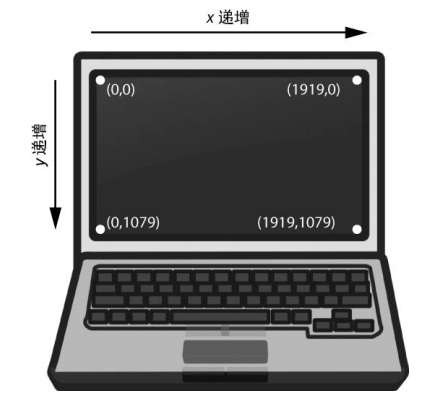

- 分辨率
    - 分辨率是屏幕的宽和高有多少像素。如果屏幕的分辨率设置为 1920 × 1080，那么左上角的坐标是（0，0），右下角的坐标是（1919，1079）。

- 编程获取电脑屏幕的宽和高的像素数
    - pyautogui.size() 函数返回两个整数的元组，包含屏幕的宽和高的像素数

In [71]:
import pyautogui
width, height = pyautogui.size()
print(width,height)

1440 900


- 移动鼠标
    - 理解了屏幕坐标，我们就可以来移动鼠标。
    - pyautogui.moveTo() 函数将鼠标立即移动到屏幕的指定位置。
        - 表示 x、y 坐标的整数值分别构成了函数的第一个和第二个参数。
        - 可选的 duration 整数或浮点数关键字参数，指定了将鼠标移到目的位置所需的秒数。如果不指定，默认值是零，表示立即移动（在 PyAutoGUI 函数中，所有的 duration 关键字参数都是可选的）。

In [72]:
import pyautogui
for i in range(5):
    pyautogui.moveTo(100, 100, duration=0.25)
    pyautogui.moveTo(200, 100, duration=0.25)
    pyautogui.moveTo(200, 200, duration=0.25)
    pyautogui.moveTo(100, 200, duration=0.25)

- pyautogui.moveRel() 函数相对于当前的位置移动鼠标
    - 该函数可以接受 3 个参数：向右水平移动多少个像素，向下垂直移动多少个像素，以及（可选的）花多少时间完成移动。为第一第二个参数提供负整数，鼠标将向左或向上移动。

In [73]:
import pyautogui
for i in range(5):
    pyautogui.moveRel(100, 0, duration=0.25)
    pyautogui.moveRel(0, 100, duration=0.25)
    pyautogui.moveRel(-100, 0, duration=0.25)
    pyautogui.moveRel(0, -100, duration=0.25)

- 获取鼠标位置
    - 通过调用 pyautogui.position() 函数，可以确定鼠标当前的位置。它将返回函数调用时，鼠标 x、y 坐标的元组。

In [75]:
pyautogui.position()

Point(x=1344, y=831)

### 控制鼠标交互
既然我们知道了如何移动鼠标，弄清楚了它在屏幕上的位置，就可以开始点击、拖动和滚动鼠标。

#### 点击鼠标

- 鼠标点击
    - 要向计算机发送虚拟的鼠标点击，就调用 pyautogui.click() 方法。默认情况下，点击将使用鼠标左键，点击发生在鼠标当前所在位置。如果希望点击在鼠标当前位置以外的地方发生，可以传入 x、y 坐标作为可选的第一第二参数。

In [76]:
#实现：鼠标移到屏幕左上角的位置，并点击一次。完整的“点击”是指按下鼠标按键，然后放开，同时不移动位置
import pyautogui
pyautogui.click(10, 5)

- 指定鼠标按键
    - 如果想指定鼠标按键，就加入 button 关键字参数，值分别为 'left'、'middle'或 'right'。例如，pyautogui.click（100，150，button='left'）将在坐标（100，150）处点击鼠标左键。而 pyautogui.click（200，250，button='right'）将在坐标（200，250）处点击右键。

In [77]:
import pyautogui
pyautogui.click(600, 509,button='right')

- 实现点击的其他方法
    - pyautogui. mouseDown()
        - 只是按下鼠标按键
    - pyautogui.mouseUp()
        - 只是释放鼠标按键
    - pyautogui.doubleClick()
        - 执行双击鼠标左键
    - pyautogui.rightClick()，pyautogui.middleClick()
        - 分别执行双击右键和双击中键

#### 拖动鼠标
“拖动”意味着移动鼠标，同时按住一个按键不放。例如，可以通过拖动文件图标，在文件夹之间移动文件等

- 具体操作
    - PyAutoGUI 提供了 pyautogui.dragTo() 和 pyautogui.dragRel() 函数，将鼠标拖动到一个新的位置，或相对当前位置的位置。 dragTo() 和 dragRel() 的参数与moveTo() 和 moveRel() 相同：x 坐标/水平移动，y 坐标/垂直移动，以及可选的时间间隔（在 OS X 上，如果鼠标移动太快，拖动会不对，所以建议提供 duration 关键字参数）。

- 测试
    - 请打开一个绘图应用，如 Windows 上的 Paint，OS X 上的Paintbrush，或 Linux 上的 GNU Paint（如果没有绘图应用，可以使用在线绘图，网址是 http://sumopaint.com/）

In [79]:
import pyautogui, time
time.sleep(2)
pyautogui.click()
distance = 200
while distance > 0:
    pyautogui.dragRel(distance, 0, duration=0.2,button='left') # move right
    distance = distance - 5
    pyautogui.dragRel(0, distance, duration=0.2,button='left') # move down
    pyautogui.dragRel(-distance, 0, duration=0.2,button='left') # move left
    distance = distance - 5
    pyautogui.dragRel(0, -distance, duration=0.2,button='left') # move up

- 注意：如果出现如下报错信息
    - AssertionError: button argument not in ('left', 'middle', 'right')
    - 则在函数中添加button参数指定鼠标按键即可

#### 滚动鼠标


- 最后一个 pyautogui 鼠标函数是 scroll()。你向它提供一个整型参数，说明向上或向下滚动多少单位，滚动发生在鼠标的当前位置。
    - 单位的意义在每个操作系统和应用上不一样，所以你必须试验，看看在你的情况下滚动多远。
    - 传递正整数表示向上滚动，传递负整数表示向下滚动

In [83]:
import pyautogui, time
time.sleep(2)
pyautogui.scroll(-300)

### 处理屏幕
你的 GUI 自动化程序没有必要盲目地点击和输入。pyautogui 拥有屏幕快照的功能，可以根据当前屏幕的内容创建图形文件。

- 注意：
    - 在 Linux 计算机上，需要安装 scrot 程序，才能在 pyautogui 中使用屏幕快照功能。在终端窗口中，执行 sudo apt-get install scrot，安装该程序。如果你使用 Windows或 OS X，就跳过这一步

#### 获取屏幕快照


- 要在 Python 中获取屏幕快照，就调用 pyautogui.screenshot() 函数,函数将返回包含一个屏幕快照的 Image 对象

In [85]:
import pyautogui
im = pyautogui.screenshot()
im.save('./123.png')

- Image对象getpixel() 
    -  getpixel() 函数传入坐标元组它将告诉你图像中这些坐标处的像素颜色。getpixel() 函数的返回值是一个 RGB 元组，包含 4 个整数，表示像素的红绿蓝值和透明度。
    - 这就是你的程序“看到”当前屏幕上内容的方法。

In [87]:
import pyautogui
im.getpixel((23,560))

(245, 246, 246, 255)

#### 分析屏幕快照

- 举个栗子：
    - 假设你的 GUI 自动化程序中，有一步是点击灰色按钮。在调用 click() 方法之前，你可以获取屏幕快照，查看脚本要点击处的像素。如果它的颜色和灰色按钮不一样，那么程序就知道出问题了。也许窗口发生了意外的移动，或者弹出式对话框挡住了该按钮。这时，不应该继续（可能会点击到错误的东西，造成严重破坏），程序可以“看到”它没有点击在正确的东西上，并自行停止。

- pixelMatchesColor() 函数
    - 参数：
        - 第一和第二个参数是整数，对应 x 和 y 坐标。第三个参数是一个元组，包含 3 个整数，是屏幕像素必须匹配的 RGB 颜色
    - 返回值：
        - 如果屏幕上指定的 x、y 坐标处的像素与指定的颜色匹配，PyAutoGUI 的pixelMatchesColor() 函数将返回 True。

In [90]:
import pyautogui
im = pyautogui.screenshot()
print(im.getpixel((500, 200)))
result = pyautogui.pixelMatchesColor(300, 200, (248, 248, 248))
print(result)

(248, 248, 248, 255)
False


### 图像识别


- opencv简介
    - Opencv（Open Source Computer Vision Library）是一个基于开源发行的跨平台计算机视觉库，它实现了图像处理和计算机视觉方面的很多通用算法，已成为计算机视觉领域最有力的研究工具。
    - 在这里我们要区分两个概念：图像处理和计算机视觉的区别：
        - 图像处理侧重于“处理”图像--如增强，还原，去噪，分割等等；
        - 而计算机视觉重点在于使用计算机来模拟人的视觉，因此模拟才是计算机视觉领域的最终目标。

- opencv环境安装：
    - pip install opencv-python==3.4.5.20

- 测试

In [91]:
import cv2

如果事先不知道应该点击哪里，怎么办？可以使用图像识别。向PyAutoGUI 提供希望点击的图像，让它去弄清楚坐标。

- 操作
    - 打开腾讯会议，识别【加入会议】按钮，对其进行点击操作

In [93]:
import cv2
import pyautogui
import time
time.sleep(2)
#获取带有腾讯会议的屏幕快照且保存到本地
im = pyautogui.screenshot()
im.save('screen.png')

#基于cv2读取照片
screen = cv2.imread('./screen.png')
joinMeeting = cv2.imread('./joinMeeting.png')
#在屏幕快照中对比加入会议按钮照片，定位其准确位置
result = cv2.matchTemplate(joinMeeting,screen, cv2.TM_CCOEFF_NORMED)
#result是一个二维列表，列表中最大值元素的位置就是我们对比后相似度最高的图片【最上角】位置
print(result)

#minMaxLoc返回一个元组，其中三个元素，以此为最不相似点分数，最相似点分数，最不相似点位置坐标，最相似点位置坐标
pos_start = cv2.minMaxLoc(result)[3] #获取最相似点相似坐标
print(pos_start) 
# x = pos_start[0]
# y = pos_start[1]

#定位到点击图片的中间位置
x = int(pos_start[0]) + int(joinMeeting.shape[1] / 2)
y = int(pos_start[1]) + int(joinMeeting.shape[0] / 2)

time.sleep(1)
pyautogui.click(x,y)


[[-0.03300207 -0.02343242 -0.01220054 ...  0.01368432  0.00978351
   0.00445915]
 [-0.04668754 -0.03740807 -0.02737257 ... -0.0142258  -0.01773539
  -0.0223386 ]
 [-0.05514864 -0.04633744 -0.03648057 ... -0.02022694 -0.02312695
  -0.02617623]
 ...
 [-0.12414803 -0.10688399 -0.08685119 ...  0.03991041  0.04926782
   0.05959205]
 [-0.12446044 -0.10724287 -0.08728681 ...  0.05305367  0.06296983
   0.0739925 ]
 [-0.12511653 -0.10798857 -0.08818725 ...  0.04885091  0.05691899
   0.06510597]]
(874, 175)


### 控制键盘
pyautogui 也有一些函数向计算机发送虚拟按键，让你能够填充表格，或在应用中输入文本。

#### 通过键盘发送一个字符串
- pyautogui.typewrite() 函数向计算机发送虚拟按键。这些按键产生什么效果，取决于当前获得焦点的窗口和文本输入框。可能需要先向文本输入框发送一次鼠标点击，确保它获得焦点。
    - 举一个简单的例子，让我们用 Python 自动化在文件编辑窗口中输入 Helloworld!。首先，打开一个新的文件编辑窗口，将它放在屏幕的左上角，以便pyautogui 点击正确的位置，让它获得焦点

In [104]:
import pyautogui
import time
time.sleep(2)
pyautogui.click(300, 300)
time.sleep(2)
pyautogui.typewrite('Hello world!',interval=0.25)

- typewrite()参数介绍：
    - message：键盘录入的内容
        - 字符串
        - 列表：键字符串的列表
            - pyautogui.typewrite(['a', 'b', 'left', 'left', 'X', 'Y'])
    - interval：在每个字符之间添加短时间暂停
    - 注意：对于 A 或!这样的字符，pyautogui 将自动模拟按住 Shift 键。

#### 键名
不是所有的键都很容易用单个文本字符来表示。例如，如何把 Shift 键或左箭头键表示为单个字符？在 PyAutoGUI 中，这些键表示为短的字符值：'esc' 表示 Esc 键，'enter' 表示 Enter。

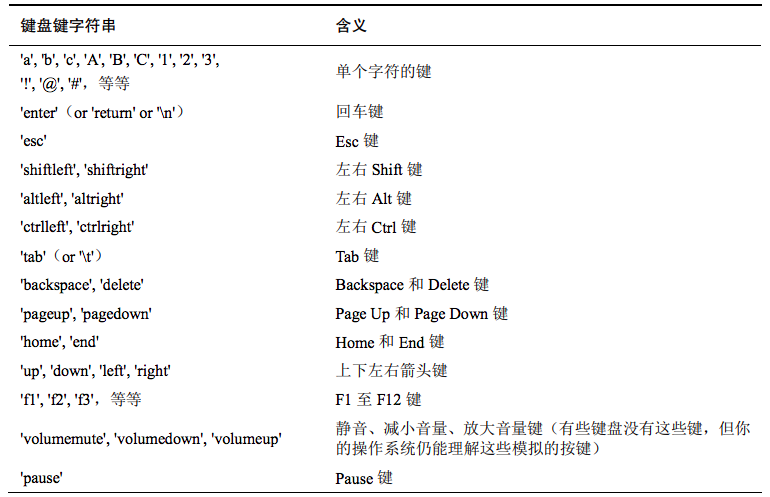

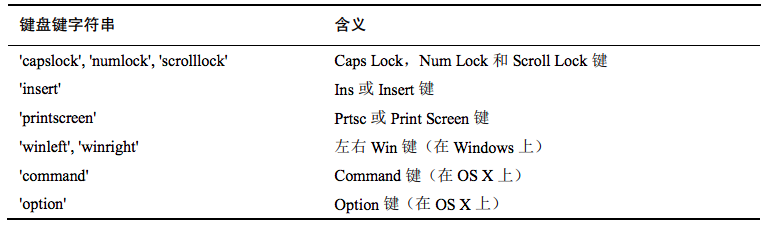

- press按下按键

In [105]:
import pyautogui
import time
time.sleep(2)
pyautogui.click(300, 300)
time.sleep(2)
pyautogui.typewrite('Hello world!',interval=0.25)
time.sleep(1)
pyautogui.press('enter')
time.sleep(2)
pyautogui.typewrite('Hello world!',interval=0.25)

#### 按下和释放键盘
就像 mouseDown() 和 mouseUp() 函数一样，pyautogui.keyDown() 和 pyautogui.keyUp() 将向计算发送虚拟的按键和释放。方便起见，pyautogui 提供了pyautogui.press() 函数，它调用这两个函数，模拟完整的击键。

- 例子：打印出美元字符（通过按住 Shift 键并按 4 得到）

In [112]:
import pyautogui
import time
time.sleep(2)
pyautogui.keyDown('shift')
pyautogui.press('4')
pyautogui.keyUp('shift')

#### 热键组合


- “热键”或“快捷键”是一种按键组合，它调用某种应用功能。拷贝选择内容的常用热键是 Ctrl-C。用户按住Ctrl键，然后按C键，然后释放C和Ctrl键。
    - 要用pyautogui的keyDown() 和keyUp() 函数来做到这一点

In [113]:
import pyautogui
import time
time.sleep(2)
pyautogui.keyDown('command')
pyautogui.press('v')
pyautogui.keyUp('command')

- 这相当复杂。作为替代，可以使用 pyautogui.hotkey() 函数，它接受多个键字符串参数，按顺序按下，再按相反的顺序释放。例如对于 Ctrl-C，代码就像下面这样简单：

In [114]:
import pyautogui
import time
time.sleep(2)
pyautogui.hotkey('command', 'v')

### 项目：微信自动化

- 注意：微信官方给出的pywx已然失效，则除了GUI别无他法自动化操作微信了。

In [116]:
import cv2
import os
import pyperclip #用于复制粘贴的模块
import pyautogui
import time
time.sleep(2)

#从屏幕screen中找到source的位置坐标(找到微信搜索框的位置)
def findImg():
    im = pyautogui.screenshot()
    im.save('screen.png')
    screen = cv2.imread('./screen.png')
    joinMeeting = cv2.imread('./wechat.png')
    result = cv2.matchTemplate(joinMeeting,screen, cv2.TM_CCOEFF_NORMED)
    pos_start = cv2.minMaxLoc(result)[3] #获取最相似点相似坐标
    x = int(pos_start[0]) + int(joinMeeting.shape[1] / 2)
    y = int(pos_start[1]) + int(joinMeeting.shape[0] / 2)
    return x,y

#向搜索框中录入要查找的好友名称:name好友名称，x，y搜索框位置
def send_name_to_search(x,y,name):
    pyautogui.click(x,y)
    time.sleep(1)
    #赋值好友名称
    pyperclip.copy(name)
    #粘贴复制内容
    pyautogui.hotkey('command', 'v')
    time.sleep(1)
    pyautogui.hotkey('enter')
    #向下移动100个像素定位到搜索到第一个好友位置点击
#     pyautogui.moveTo(x, y+80)
#     pyautogui.click(x, y+80)

    
#向好友发送消息
def send_msg(msg):
    pyperclip.copy(msg)
    pyautogui.hotkey('command', 'v')
    pyautogui.hotkey('enter')

    
#主要程序
x,y = findImg()
send_name_to_search(x,y,'传输')
send_msg('i love learn Python!!!')
time.sleep(1)
send_msg('i love learn Python!!!') 
time.sleep(1)

send_name_to_search(x,y,'站山')
send_msg('GUI测试，无需理会')
time.sleep(1)
send_msg('GUI测试，无需理会')

### 监视程序

In [2]:
import pyautogui
import cv2
import yagmail
import schedule
import time

def run():
    print('开始监视......')
    #截取屏幕图片
    myScreenshot = pyautogui.screenshot()
    myScreenshot.save(r'screen.png') 
    #基于cv2打开电脑摄像头，捕获实施照片
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    time.sleep(3)
    cv2.imwrite('photo.jpg', frame)
    #关闭摄像头
    cap.release()
    
    received = ['zhangxiaobo@oldboyedu.com']  
    yag = yagmail.SMTP(user='328410948@qq.com', host='smtp.qq.com')
    contents = ['<b> <font color="#FF1493" size="10"> Bobo大人您好，一切都在监视中，尽情放心！</font> </b>',
        "screen.png",
        'photo.jpg' ]

    yag.send(received, '来自小鬼侦探的报告', contents)
    
schedule.every().minute.at(":30").do(run)
while True:
    schedule.run_pending()
    time.sleep(5)



开始监视......
开始监视......
开始监视......


KeyboardInterrupt: 